In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import load_iris, load_diabetes, load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, auc

In [2]:
X, y = load_digits(return_X_y=True)
X = X + np.random.normal(0, 10, X.shape)

idx = (y == 8) + (y == 6)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.5
)

y_train = (y_train == 8).astype(int)
y_test = (y_test == 8).astype(int)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict_proba(X_train)
y_pred_test = model.predict_proba(X_test)

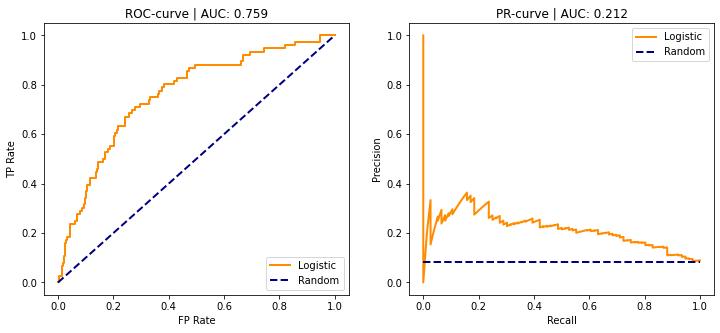

In [29]:
# fpr, tpr, _ = roc_curve(y_train, y_pred_train[:,1])
fpr, tpr, _ = roc_curve(y_test, y_pred_test[:,1])
precision, recall, _ = precision_recall_curve(y_test, y_pred_test[:,1])
lw = 2

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
ax.plot(
    fpr,
    tpr,
    color='darkorange',
    lw=lw,
    label='Logistic',
)
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Random')
ax.set_xlabel('FP Rate')
ax.set_ylabel('TP Rate')
ax.set_title('ROC-curve | AUC: '+str(auc(fpr, tpr).round(3)))
ax.legend(loc='lower right')

ax = fig.add_subplot(122)
ax.plot(
    recall,
    precision,
    color='darkorange',
    lw=lw,
    label='Logistic',
)
ax.plot([0, 1], [y_test.mean(), y_test.mean()], color='navy', lw=lw, linestyle='--', label='Random')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('PR-curve | AUC: '+str(auc(recall, precision).round(3)))
ax.legend(loc='upper right')

plt.show()